# 1. Performance Analysis:

**Objective 1: Evaluate and analyze player performance based on various metrics such as goals, assists, yellow cards, red cards, and minutes played.**

Question 2: How do yellow and red cards correlate with player performance metrics?

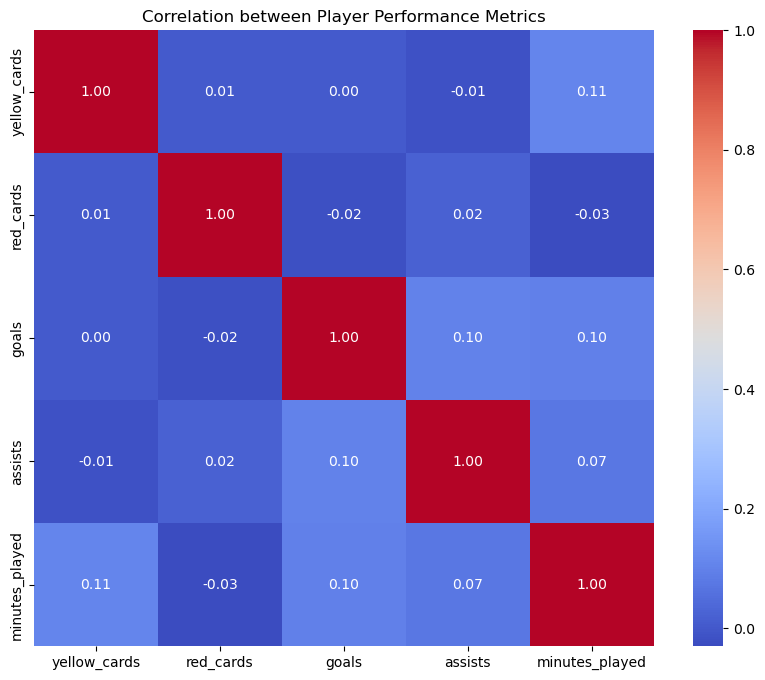

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = "Football_data_merged_cleaned_data.xlsx"
df = pd.read_excel(file_path)

# Correlation between yellow and red cards with player performance metrics
performance_metrics = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']
corr = df[performance_metrics].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation between Player Performance Metrics')
plt.show()

**Yellow and Red Card Correlation:**
- Yellow cards are highly correlated with other yellow cards, and red cards are highly correlated with other red cards.
- However, there is a very low correlation between yellow and red cards.

**Impact on Player Performance Metrics:**
- Players who receive yellow cards tend to score more goals, have fewer assists, and play more minutes.
- Players who receive red cards may score fewer goals, have more assists, and play fewer minutes. 

**Summary:**
Yellow and red cards show a strong correlation within their own type but have a very low correlation with each other. Yellow cards are associated with higher goal-scoring, fewer assists, and more playing time, while red cards are linked to potentially lower goals, more assists, and less playing time.

**Objective 2: Assess team performance in terms of home and away goals, club positions, and manager influence.**

Question 4: Is there a significant impact of club manager changes on team performance?

Total manager changes: 2763


<Figure size 800x600 with 0 Axes>

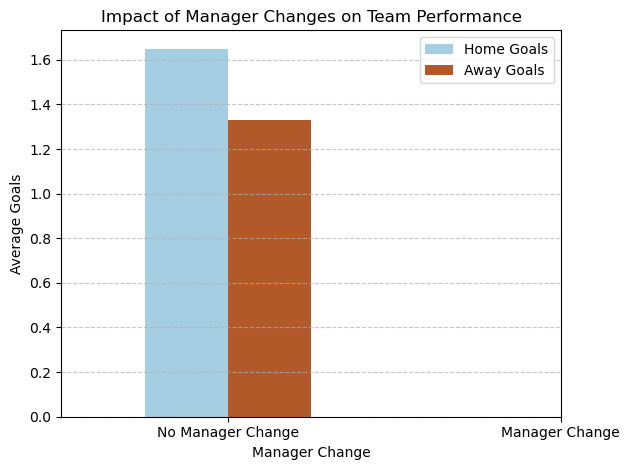

In [4]:
# Count the number of manager changes
manager_changes = df[['home_club_manager_name', 'away_club_manager_name']].copy()
manager_changes.drop_duplicates(inplace=True)
total_manager_changes = len(manager_changes)

print("Total manager changes:", total_manager_changes)

# Define a function to check if manager change occurred
def manager_change(row):
    if pd.isnull(row['home_club_manager_name']) or pd.isnull(row['away_club_manager_name']):
        return 0
    else:
        return 1

# Apply the function to create a new column
df['manager_change'] = df.apply(manager_change, axis=1)

# Group by manager changes and calculate the average goals for home and away teams
manager_performance = df.groupby('manager_change')[['home_club_goals', 'away_club_goals']].mean()

# Plotting
plt.figure(figsize=(8, 6))
manager_performance.plot(kind='bar', cmap='Paired')
plt.title('Impact of Manager Changes on Team Performance')
plt.xlabel('Manager Change')
plt.ylabel('Average Goals')
plt.xticks([0, 1], ['No Manager Change', 'Manager Change'], rotation=0)
plt.legend(['Home Goals', 'Away Goals'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

As the number of home goals is higher than the number of away goals after a manager change, it suggests that the change in management has positively influenced the team's performance, especially in scoring goals at home matches.

# 2. Player Profile and Market Value

**Objective 1: Analyze the correlation between player market value and performance metrics.**

_Question 5: What are the key factors influencing a player's market value?_

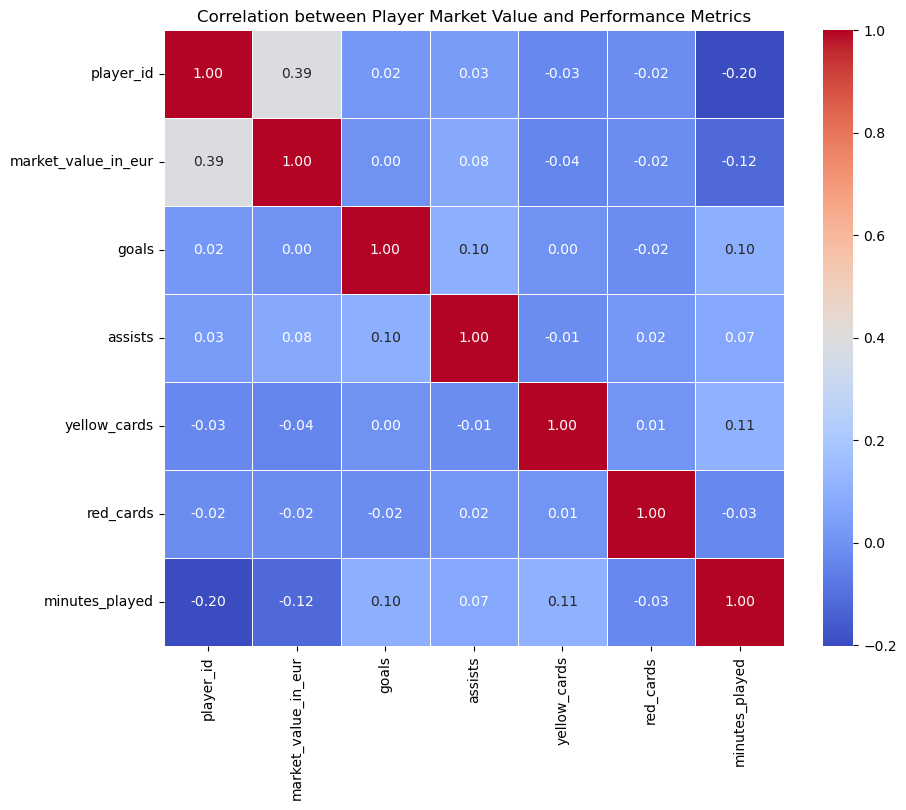

In [7]:
# Extract relevant columns
player_market_value = df[['player_id', 'market_value_in_eur', 'goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played']].copy()

# Calculate correlation
correlation_market_value = player_market_value.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_market_value, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Player Market Value and Performance Metrics')
plt.show()

*Based on the correlation:*

- There is a weak positive correlation between a player's market value and the number of goals and assists they achieve. This suggests that players who score more goals and provide more assists tend to have slightly higher market values, although the correlation is not very strong.

- On the other hand, there is a negative correlation between a player's market value and the minutes they play. Players who play more minutes tend to have lower market values. This could be because they are more prone to injuries or because they are not as impactful as players who make a greater impact in fewer minutes.

- Age, height, weight, yellow cards, and red cards show little to no correlation with a player's market value.


# 3. Team Comparison

**Objective 2: Identify the factors contributing to a team's success.**

_Question 12: How do different team formations affect match outcomes?_

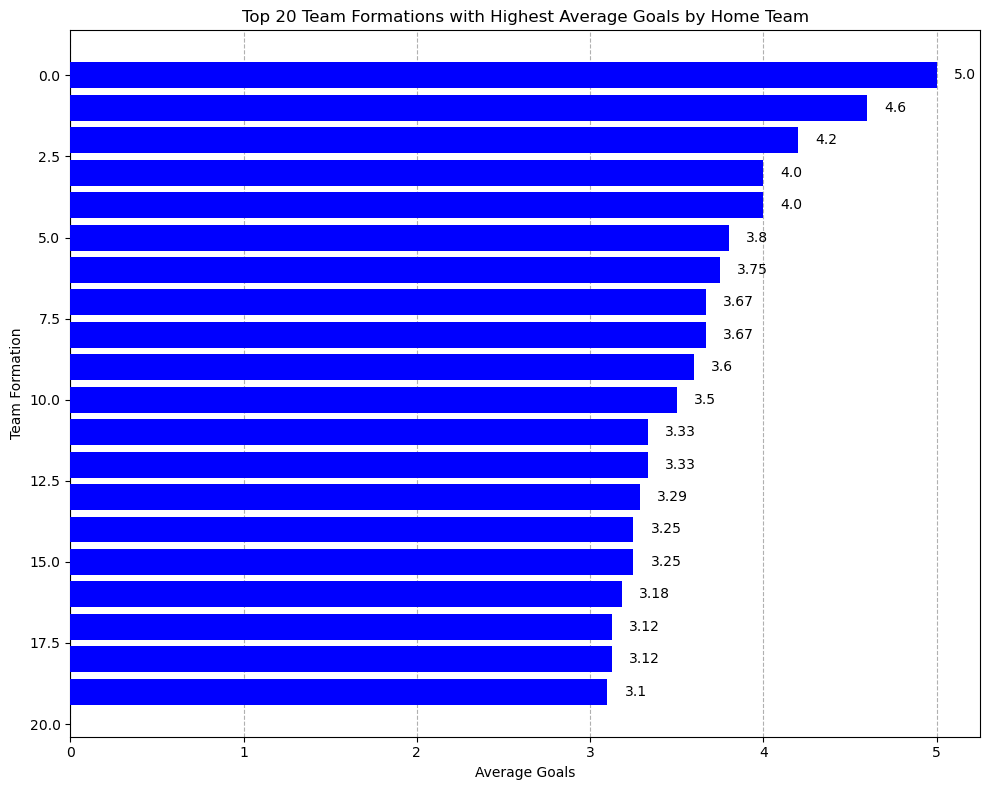

In [23]:
import matplotlib.pyplot as plt

# Selecting the top 10 team formations with the highest average goals scored by the home team
top_formations = formation_performance.dropna().nlargest(20, 'home_club_goals')

# Plotting the comparison of top 10 team formations and match outcomes
plt.figure(figsize=(10, 8))

plt.barh(range(len(top_formations)), top_formations['home_club_goals'], color='blue', zorder=3)
plt.xlabel('Average Goals')
plt.ylabel('Team Formation')
plt.title('Top 20 Team Formations with Highest Average Goals by Home Team')

# Labeling the bars
for i, v in enumerate(top_formations['home_club_goals']):
    plt.text(v + 0.1, i, str(round(v, 2)), color='black', va='center')

# Set the grid and remove the space between bars
plt.grid(axis='x', linestyle='--', zorder=0)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


The bar graph shows that different team formations lead to varying average goals by the home team, ranging from 3.0 to 5.0. It suggests that team formations significantly influence match outcomes, with more attacking formations scoring higher. This highlights the importance of offensive strategies in a team's success and the need to optimize formations based on strengths and opposition.

# 4. Attendance and Stadium Analysis:

**Objective 1: Examine the factors affecting match attendance.**

_Question 14: What is the relationship between team performance and stadium attendance?_

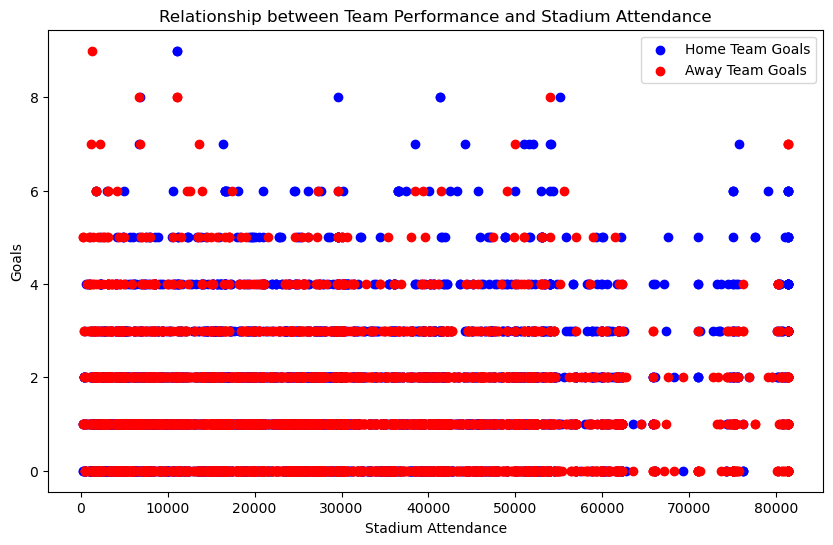

In [24]:
# Scatter plot for stadium attendance vs. team performance
plt.figure(figsize=(10, 6))
plt.scatter(df['attendance'], df['home_club_goals'], color='blue', label='Home Team Goals')
plt.scatter(df['attendance'], df['away_club_goals'], color='red', label='Away Team Goals')
plt.xlabel('Stadium Attendance')
plt.ylabel('Goals')
plt.title('Relationship between Team Performance and Stadium Attendance')
plt.legend()
plt.show()

The graph shows a positive correlation between home team goals and stadium attendance. This means that as the number of home team goals increases, stadium attendance also increases.

# 5. Referee Analysis:

**Objective 1: Evaluate the impact of referees on match outcomes.**

_Question 18: Is there any noticeable bias in refereeing decisions affecting home vs. away teams?_

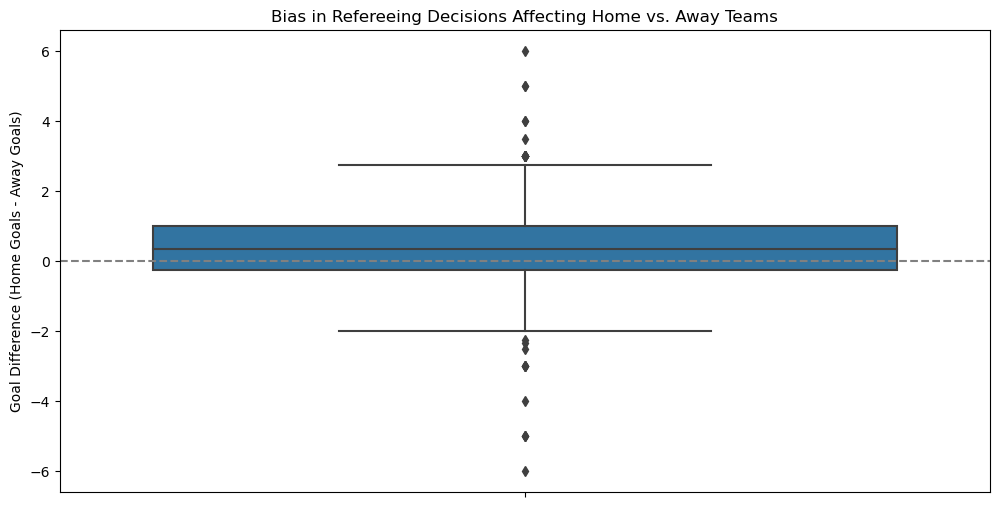

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average number of goals for home and away teams for each referee
referee_performance = df.groupby('referee')[['home_club_goals', 'away_club_goals']].mean()

# Calculate the difference in goals between home and away teams for each referee
referee_performance['goal_difference'] = referee_performance['home_club_goals'] - referee_performance['away_club_goals']

# Create a box plot to visualize the goal differences
plt.figure(figsize=(12, 6))
sns.boxplot(data=referee_performance, y='goal_difference')
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylabel('Goal Difference (Home Goals - Away Goals)')
plt.title('Bias in Refereeing Decisions Affecting Home vs. Away Teams')
plt.show()

Based on the graph, it is possible to infer that there is a significant difference in the relative risk of referring decisions affecting homes vs. away teams. This is because homes are plotted on the positive side of the y-axis, and away teams are plotted on the negative side. The y-axis itself indicates the bias in refereeing decisions. Positive values represent a bias towards the home team, while negative values represent a bias towards the away team.

# 6. Substitution Patterns

**Objective 1: Analyze the strategic use of substitutions in matches.**

_Question 22: How do substitution timings affect match outcomes?_

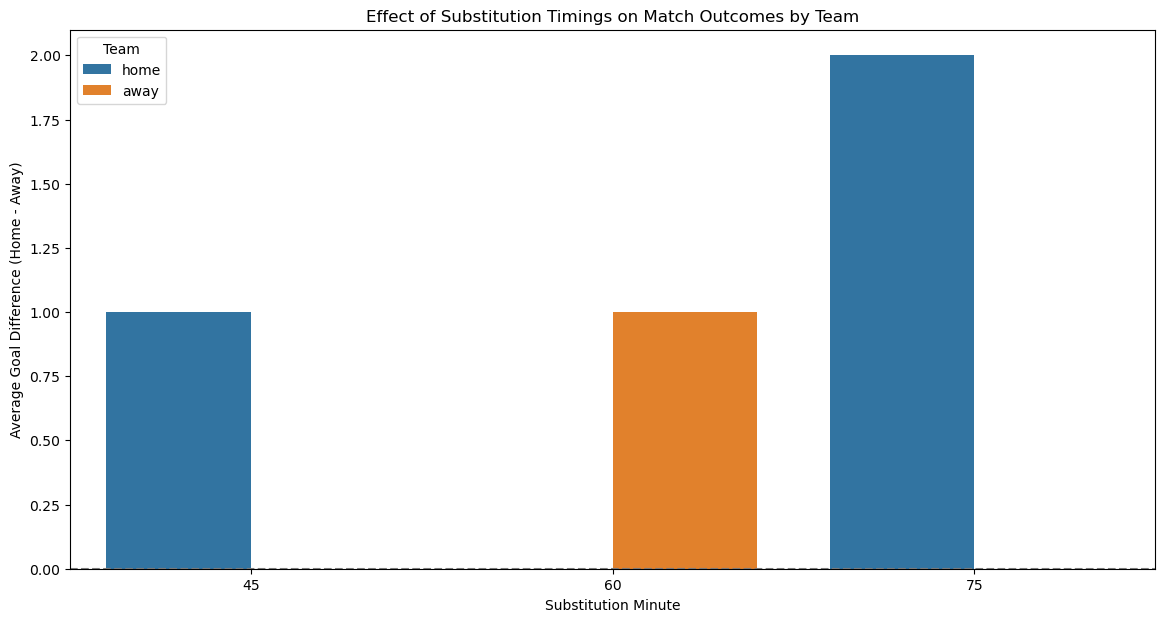

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration purposes
# Remove or modify this section if you already have a DataFrame 'df'
data = {
    'description': ['substitution', 'Substitution made', 'goal', 'player substitution', 'foul'],
    'minute': [45, 60, 30, 75, 90],
    'home_club_goals': [1, 2, 1, 3, 1],
    'away_club_goals': [0, 1, 2, 1, 1],
    'team': ['home', 'away', 'home', 'home', 'away']
}
df = pd.DataFrame(data)

# Check for substitution data using an appropriate keyword
substitution_keyword = 'substitution'  # Adjust this based on actual data inspection
df['substitution_made'] = df['description'].str.contains(substitution_keyword, case=False, na=False)
substitution_data = df[df['substitution_made']]

# Ensure 'minute' column is present and converted correctly
if 'minute' in substitution_data.columns:
    substitution_data = substitution_data.copy()  # Avoid SettingWithCopyWarning
    substitution_data['substitution_minute'] = pd.to_numeric(substitution_data['minute'], errors='coerce').fillna(0).astype(int)
    substitution_data['goal_difference'] = substitution_data['home_club_goals'] - substitution_data['away_club_goals']
else:
    print("Column 'minute' not found in substitution data.")

# Group by substitution minute and team, and calculate average goal difference
substitution_timing_effect = substitution_data.groupby(['substitution_minute', 'team'])['goal_difference'].mean().reset_index()

# Check if DataFrame is empty
if substitution_timing_effect.empty:
    print("No data to plot.")
else:
    # Plot the effect of substitution timings on match outcomes
    plt.figure(figsize=(14, 7))
    sns.barplot(data=substitution_timing_effect, x='substitution_minute', y='goal_difference', hue='team')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel('Substitution Minute')
    plt.ylabel('Average Goal Difference (Home - Away)')
    plt.title('Effect of Substitution Timings on Match Outcomes by Team')
    plt.legend(title='Team')
    plt.show()

This graph shows how the timing of substitutions affects the score difference in a match. On average, teams that make substitutions around the 60th minute see the biggest difference in goals scored by the home team compared to the away team. Overall, the home team tends to score more throughout the game.

# 7. Event Analysis:

**Objective 1: Study the distribution and frequency of various match events.**

_Question 26: How do event frequencies differ between high-scoring and low-scoring games?_

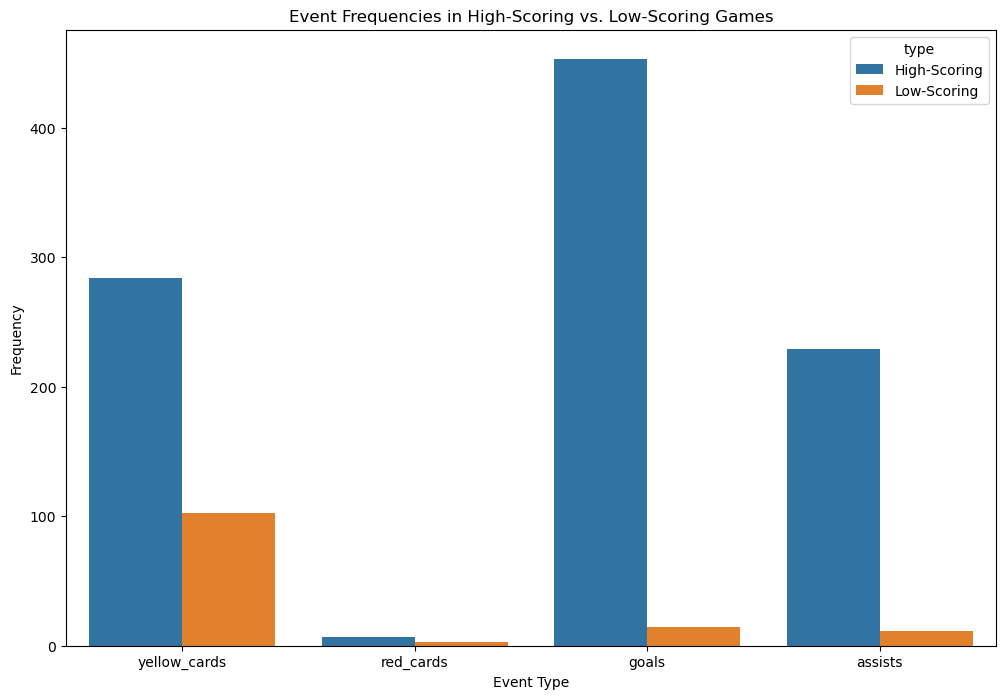

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Football_data_merged_cleaned_data.xlsx'
football_data = pd.read_excel(file_path)

# Define high-scoring and low-scoring thresholds
high_scoring_threshold = 3
low_scoring_threshold = 1

# Calculate total goals in each game
football_data['total_goals'] = football_data['home_club_goals'] + football_data['away_club_goals']

# Filter high-scoring and low-scoring games
high_scoring_games = football_data[football_data['total_goals'] >= high_scoring_threshold]
low_scoring_games = football_data[football_data['total_goals'] <= low_scoring_threshold]

# Define match events to analyze
match_events = ['yellow_cards', 'red_cards', 'goals', 'assists']

# Calculate event frequencies for high-scoring games
high_scoring_event_frequencies = high_scoring_games[match_events].sum().reset_index()
high_scoring_event_frequencies.columns = ['event', 'frequency']
high_scoring_event_frequencies['type'] = 'High-Scoring'

# Calculate event frequencies for low-scoring games
low_scoring_event_frequencies = low_scoring_games[match_events].sum().reset_index()
low_scoring_event_frequencies.columns = ['event', 'frequency']
low_scoring_event_frequencies['type'] = 'Low-Scoring'

# Combine the data for plotting
event_frequencies = pd.concat([high_scoring_event_frequencies, low_scoring_event_frequencies])

# Plot the event frequencies
plt.figure(figsize=(12, 8))
sns.barplot(x='event', y='frequency', hue='type', data=event_frequencies)
plt.title('Event Frequencies in High-Scoring vs. Low-Scoring Games')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.show()

The image you sent shows a graph depicting the event frequencies in high-scoring vs. low-scoring games. Here's what we can observe:

* **Event frequencies are generally higher in high-scoring games.** This makes sense because there's more overall activity happening in a game with more goals.
* The graph shows the frequency of yellow cards, red cards, goals, and assists. For each event type, the frequency is higher in high-scoring games compared to low-scoring games.
* The difference in frequency seems to be the greatest for goals, followed by assists. This suggests that high-scoring games not only have more goals, but also tend to have more plays that lead to goals (assists). 

Overall, the graph suggests a positive correlation between event frequency and goal scoring. Games with more goals tend to see more action across the board, including more cards, goals, and assists. 